## Feteching Datasets

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [10]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [11]:
x, y = mnist['data'], mnist['target']
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
x.shape

(70000, 784)

In [13]:
y.shape

(70000,)

In [14]:
%matplotlib inline


In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [55]:
# Visualize one sample
some_digit = x.iloc[36001]  # Use iloc for positional indexing
some_digit_image = some_digit.values.reshape(28, 28)

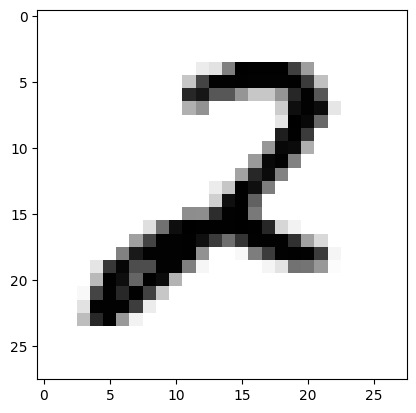

(0.0, 1.0, 0.0, 1.0)

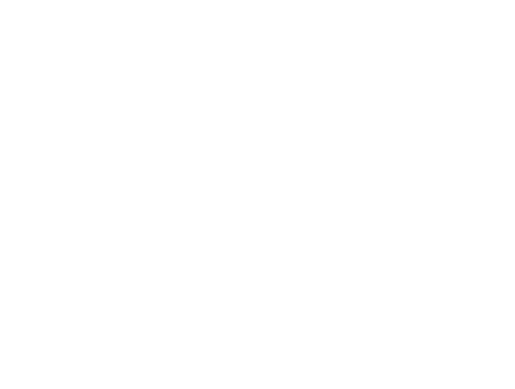

In [56]:
# Plot the sample image
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()
plt.axis("off")

In [57]:
y[36000]

'9'

In [58]:
x_train, x_test=x[:60000],x[60000:]

In [59]:
y_train, y_test=y[:60000],y[60000:]

In [60]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [61]:
x_train = x_train.iloc[shuffle_index]  # Use iloc to index the DataFrame
y_train = y_train.iloc[shuffle_index]

## Creating a 2 detector

In [62]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2 =(y_train==2)
y_test_2 =(y_test==2)

In [63]:
y_train_2
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

## Using Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf=LogisticRegression(tol=0.1)

In [66]:
clf.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [67]:
clf.predict([some_digit])

C:\Users\prade\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [68]:
from sklearn.model_selection import cross_val_score 

In [73]:
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")
a

array([0.98085, 0.9778 , 0.97865])

In [74]:
a.mean()

0.9791

## Using Support Vector Machine Alogrithm

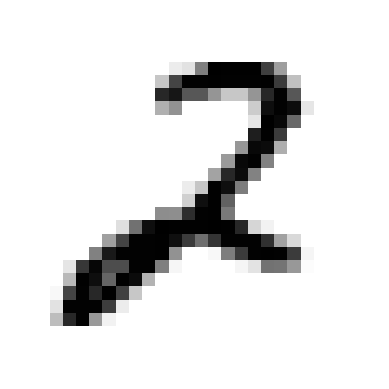

C:\Users\prade\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction for the sample digit: [ True]
Cross-validation scores: [0.99362511 0.99335726 0.99512483]
Mean cross-validation accuracy: 0.9940357337337885


In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

# Visualize one sample
some_digit = x.iloc[36001]  # Use iloc for positional indexing
some_digit_image = some_digit.values.reshape(28, 28)

# Plot the sample image
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Shuffle the training data
shuffle_index = np.random.permutation(len(y_train))
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

# Convert target variable to int8
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# Create binary labels for the digit '2'
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

# Initialize the SVC model
clf = SVC(gamma='scale')  # You can adjust the parameters as needed

# Fit the SVC model
clf.fit(x_train, y_train_2)

# Make a prediction (using the sample digit)
prediction = clf.predict([some_digit])
print(f"Prediction for the sample digit: {prediction}")

# Perform cross-validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(f"Cross-validation scores: {a}")
print(f"Mean cross-validation accuracy: {a.mean()}")
